# BUSINESS PROBLEM & UNDERSTANDING
STAKEHOLDER:SPOTIFY
PROBLEM: Spotify is launch a new Movie Divison. We are contracted Data Scientist tasked with  creating a reccomendation system . We want to compete with other streaming platforms such as Netflix, Hulu, Amazon Prime. Since they are new to the market, they want to ensure that their Reccomendation System is accurate and reliable.   

 Your task is to:

Build a model that provides top 5 movie recommendations to a user, based on their ratings of other movies.
The MovieLens dataset is a "classic" recommendation system dataset, that is used in numerous academic papers and machine learning proofs-of-concept. You will need to create the specific details about how the user will provide their ratings of other movies, in addition to formulating a more specific business problem within the general context of "recommending movies".




# Data Preparation

In [1]:
#Importing Libraries 
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Reading in datasets
df_movies = pd.read_csv('data/movies.csv')
df_links = pd.read_csv('data/links.csv')
df_ratings = pd.read_csv('data/ratings.csv')
df_tags = pd.read_csv('data/tags.csv')

In [3]:
#looking at each indivdual csv before merging.
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [4]:
df_links.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


In [5]:
df_ratings.head()


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
df_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


Convertig Ratings and Tags Timestamps to Datetime format

In [7]:
df_ratings['timestamp'] = pd.to_datetime(df_ratings['timestamp'])
df_tags['timestamp'] = pd.to_datetime(df_tags['timestamp'])

In [8]:
df_ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,1970-01-01 00:00:00.964982703
1,1,3,4.0,1970-01-01 00:00:00.964981247
2,1,6,4.0,1970-01-01 00:00:00.964982224
3,1,47,5.0,1970-01-01 00:00:00.964983815
4,1,50,5.0,1970-01-01 00:00:00.964982931
...,...,...,...,...
100831,610,166534,4.0,1970-01-01 00:00:01.493848402
100832,610,168248,5.0,1970-01-01 00:00:01.493850091
100833,610,168250,5.0,1970-01-01 00:00:01.494273047
100834,610,168252,5.0,1970-01-01 00:00:01.493846352


In [9]:
df_tags

,userId,movieId,tag,timestamp
0,2,60756,funny,1970-01-01 00:00:01.445714994
1,2,60756,Highly quotable,1970-01-01 00:00:01.445714996
2,2,60756,will ferrell,1970-01-01 00:00:01.445714992
3,2,89774,Boxing story,1970-01-01 00:00:01.445715207
4,2,89774,MMA,1970-01-01 00:00:01.445715200
...,...,...,...,...
3678,606,7382,for katie,1970-01-01 00:00:01.171234019
3679,606,7936,austere,1970-01-01 00:00:01.173392334
3680,610,3265,gun fu,1970-01-01 00:00:01.493843984
3681,610,3265,heroic bloodshed,1970-01-01 00:00:01.493843978


Merging Dataset to one Pandas Database

In [10]:
# combining the Movies, Ratings, Tags Dataset. Not including Links dataset due to its non relevance to the business problem.
movie_combo = pd.merge(df_movies, df_tags, left_on='movieId', right_on='movieId', how='left')

movie_combo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11853 entries, 0 to 11852
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   movieId    11853 non-null  int64         
 1   title      11853 non-null  object        
 2   genres     11853 non-null  object        
 3   userId     3683 non-null   float64       
 4   tag        3683 non-null   object        
 5   timestamp  3683 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 648.2+ KB


In [11]:
movie_combo.head()

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336.0,pixar,1970-01-01 00:00:01.139045764
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474.0,pixar,1970-01-01 00:00:01.137206825
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567.0,fun,1970-01-01 00:00:01.525286013
3,2,Jumanji (1995),Adventure|Children|Fantasy,62.0,fantasy,1970-01-01 00:00:01.528843929
4,2,Jumanji (1995),Adventure|Children|Fantasy,62.0,magic board game,1970-01-01 00:00:01.528843932


In [12]:
# Merge movies_ratings with tags.csv
new_df = movie_combo.merge(df_ratings, how='left', on = ['movieId', 'userId'] )
new_df.drop_duplicates(inplace=True)
new_df.head()

,movieId,title,genres,userId,tag,timestamp_x,rating,timestamp_y
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336.0,pixar,1970-01-01 00:00:01.139045764,4.0,1970-01-01 00:00:01.122227329
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474.0,pixar,1970-01-01 00:00:01.137206825,4.0,1970-01-01 00:00:00.978575760
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567.0,fun,1970-01-01 00:00:01.525286013,3.5,1970-01-01 00:00:01.525286001
3,2,Jumanji (1995),Adventure|Children|Fantasy,62.0,fantasy,1970-01-01 00:00:01.528843929,4.0,1970-01-01 00:00:01.528843890
4,2,Jumanji (1995),Adventure|Children|Fantasy,62.0,magic board game,1970-01-01 00:00:01.528843932,4.0,1970-01-01 00:00:01.528843890


In [13]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11853 entries, 0 to 11852
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   movieId      11853 non-null  int64         
 1   title        11853 non-null  object        
 2   genres       11853 non-null  object        
 3   userId       3683 non-null   float64       
 4   tag          3683 non-null   object        
 5   timestamp_x  3683 non-null   datetime64[ns]
 6   rating       3476 non-null   float64       
 7   timestamp_y  3476 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(1), object(3)
memory usage: 833.4+ KB


In [14]:
new_df.head()

,movieId,title,genres,userId,tag,timestamp_x,rating,timestamp_y
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336.0,pixar,1970-01-01 00:00:01.139045764,4.0,1970-01-01 00:00:01.122227329
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474.0,pixar,1970-01-01 00:00:01.137206825,4.0,1970-01-01 00:00:00.978575760
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567.0,fun,1970-01-01 00:00:01.525286013,3.5,1970-01-01 00:00:01.525286001
3,2,Jumanji (1995),Adventure|Children|Fantasy,62.0,fantasy,1970-01-01 00:00:01.528843929,4.0,1970-01-01 00:00:01.528843890
4,2,Jumanji (1995),Adventure|Children|Fantasy,62.0,magic board game,1970-01-01 00:00:01.528843932,4.0,1970-01-01 00:00:01.528843890


In [15]:
#dropping duplicate Movie entries
new_df.drop_duplicates('movieId', inplace=True)

In [16]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9742 entries, 0 to 11852
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   movieId      9742 non-null   int64         
 1   title        9742 non-null   object        
 2   genres       9742 non-null   object        
 3   userId       1572 non-null   float64       
 4   tag          1572 non-null   object        
 5   timestamp_x  1572 non-null   datetime64[ns]
 6   rating       1448 non-null   float64       
 7   timestamp_y  1448 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(1), object(3)
memory usage: 685.0+ KB


In [17]:
new_df.head()

,movieId,title,genres,userId,tag,timestamp_x,rating,timestamp_y
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336.0,pixar,1970-01-01 00:00:01.139045764,4.0,1970-01-01 00:00:01.122227329
3,2,Jumanji (1995),Adventure|Children|Fantasy,62.0,fantasy,1970-01-01 00:00:01.528843929,4.0,1970-01-01 00:00:01.528843890
7,3,Grumpier Old Men (1995),Comedy|Romance,289.0,moldy,1970-01-01 00:00:01.143424860,2.5,1970-01-01 00:00:01.143424657
9,4,Waiting to Exhale (1995),Comedy|Drama|Romance,NaN,NaN,NaT,NaN,NaT
10,5,Father of the Bride Part II (1995),Comedy,474.0,pregnancy,1970-01-01 00:00:01.137373903,1.5,1970-01-01 00:00:01.053021982


One Hot Encoding since Genre is a Categorical Column. 

In [18]:
categorical_vars = ["genres"]
one_hot_encoder = OneHotEncoder(sparse=False, drop = "first")

In [19]:
encoder_vars_array = one_hot_encoder.fit_transform(new_df[categorical_vars])
encoder_feature_names = one_hot_encoder.get_feature_names(categorical_vars)
encoder_vars_df = pd.DataFrame(encoder_vars_array, columns = encoder_feature_names)
Data = pd.concat([new_df.reset_index(drop=True), encoder_vars_df.reset_index(drop=True)], axis = 1)
Data.drop(categorical_vars, axis = 1, inplace = True)

In [20]:
Data.head()

,movieId,title,userId,tag,timestamp_x,rating,timestamp_y,genres_Action,genres_Action|Adventure,genres_Action|Adventure|Animation,...,genres_Romance|Thriller,genres_Romance|War,genres_Romance|Western,genres_Sci-Fi,genres_Sci-Fi|IMAX,genres_Sci-Fi|Thriller,genres_Sci-Fi|Thriller|IMAX,genres_Thriller,genres_War,genres_Western
0,1,Toy Story (1995),336.0,pixar,1970-01-01 00:00:01.139045764,4.0,1970-01-01 00:00:01.122227329,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji (1995),62.0,fantasy,1970-01-01 00:00:01.528843929,4.0,1970-01-01 00:00:01.528843890,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men (1995),289.0,moldy,1970-01-01 00:00:01.143424860,2.5,1970-01-01 00:00:01.143424657,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Waiting to Exhale (1995),NaN,NaN,NaT,NaN,NaT,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Father of the Bride Part II (1995),474.0,pregnancy,1970-01-01 00:00:01.137373903,1.5,1970-01-01 00:00:01.053021982,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# EDA and Visualizations 

In [21]:
print('Number of users: ',len(Data.userId.unique()))
print('Number of movie titles: ',len(Data.movieId.unique()))
print('Number of ratings: ' ,Data.shape[0])
print('Number of tags: ' ,Data.tag.count())


Number of users:  50
Number of movie titles:  9742
Number of ratings:  9742
Number of tags:  1572


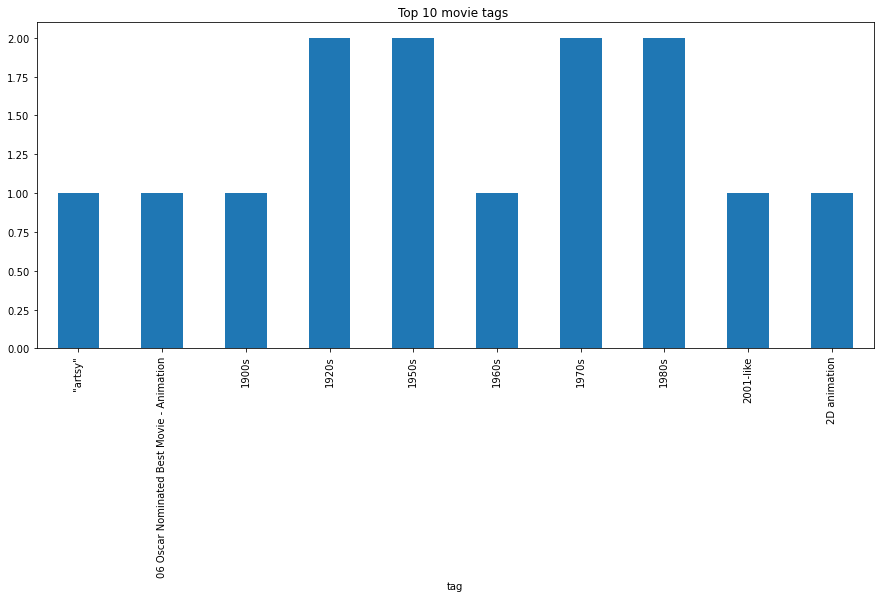

In [39]:
# groupby tags 
group = Data.groupby('tag').count()




group[:10].rating.plot(kind='bar', figsize=(15,6))



plt.title('Top 10 movie tags ');